In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [12]:
df_paths=glob.glob(r"C:\Users\NTCUONG\notebook\training_LR\*.csv")
df_paths

['C:\\Users\\NTCUONG\\notebook\\training_LR\\training1.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training10.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training11.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training12.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training2.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training3.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training4.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training5.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training6.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training7.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training8.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training9.csv']

In [13]:
RandomForestRegressor()

RandomForestRegressor()

In [14]:
statistic_tup={
"dataset":[],
"n_estimators":[],
"max_depth":[],
"criterion":[],
"r2":[],
"mae":[]
}
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]
meta_model = GradientBoostingRegressor()
model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
for path in df_paths:
    df=pd.read_csv(path)
    
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    param1=[5, 10, 15]
    param2=[5, 7, 9]
    param3=["squared_error", "absolute_error", "friedman_mse"]
    
    for c in param1:
        for s in param2:
            for m in param3:
                model=RandomForestRegressor(n_estimators=c, max_depth=s, criterion=m)
                model.fit(X_train,y_train)
                y_pred=model.predict(X_test)
                statistic_tup["dataset"].append(path[-13:-1])
                statistic_tup["n_estimators"].append(c)
                statistic_tup["max_depth"].append(s)
                statistic_tup["criterion"].append(m)
                statistic_tup["r2"].append(r2_score(y_test,y_pred))
                statistic_tup["mae"].append(mean_absolute_error(y_test,y_pred))
    print(path)
    
statistic=pd.DataFrame(statistic_tup)
statistic

C:\Users\NTCUONG\notebook\training_LR\training1.csv
C:\Users\NTCUONG\notebook\training_LR\training10.csv
C:\Users\NTCUONG\notebook\training_LR\training11.csv
C:\Users\NTCUONG\notebook\training_LR\training12.csv
C:\Users\NTCUONG\notebook\training_LR\training2.csv
C:\Users\NTCUONG\notebook\training_LR\training3.csv
C:\Users\NTCUONG\notebook\training_LR\training4.csv
C:\Users\NTCUONG\notebook\training_LR\training5.csv
C:\Users\NTCUONG\notebook\training_LR\training6.csv
C:\Users\NTCUONG\notebook\training_LR\training7.csv
C:\Users\NTCUONG\notebook\training_LR\training8.csv
C:\Users\NTCUONG\notebook\training_LR\training9.csv


,dataset,n_estimators,max_depth,criterion,r2,mae
0,training1.cs,5,5,squared_error,0.860872,20764.155484
1,training1.cs,5,5,absolute_error,0.819680,22902.419521
2,training1.cs,5,5,friedman_mse,0.855786,21959.392860
3,training1.cs,5,7,squared_error,0.854483,21412.258412
4,training1.cs,5,7,absolute_error,0.850377,21102.011301
...,...,...,...,...,...,...
319,training9.cs,15,7,absolute_error,0.780599,25429.709475
320,training9.cs,15,7,friedman_mse,0.810312,24872.348373
321,training9.cs,15,9,squared_error,0.821012,23621.773876
322,training9.cs,15,9,absolute_error,0.797443,24131.722945


In [15]:
sort_df=statistic.sort_values(["r2"],ascending=False)

In [16]:
sort_df

,dataset,n_estimators,max_depth,criterion,r2,mae
23,training1.cs,15,7,friedman_mse,0.890557,19251.820785
266,training7.cs,15,7,friedman_mse,0.888843,18423.999000
17,training1.cs,10,9,friedman_mse,0.886321,19292.610822
255,training7.cs,10,7,squared_error,0.886259,19197.035143
249,training7.cs,5,9,squared_error,0.884851,19293.904747
...,...,...,...,...,...,...
119,training2.cs,10,5,friedman_mse,0.721629,29036.045092
110,training2.cs,5,5,friedman_mse,0.718086,29811.272499
115,training2.cs,5,9,absolute_error,0.715803,27158.955479
298,training9.cs,5,5,absolute_error,0.700700,29449.707877


In [17]:
sort_df.iloc[0,0]


'training1.cs'

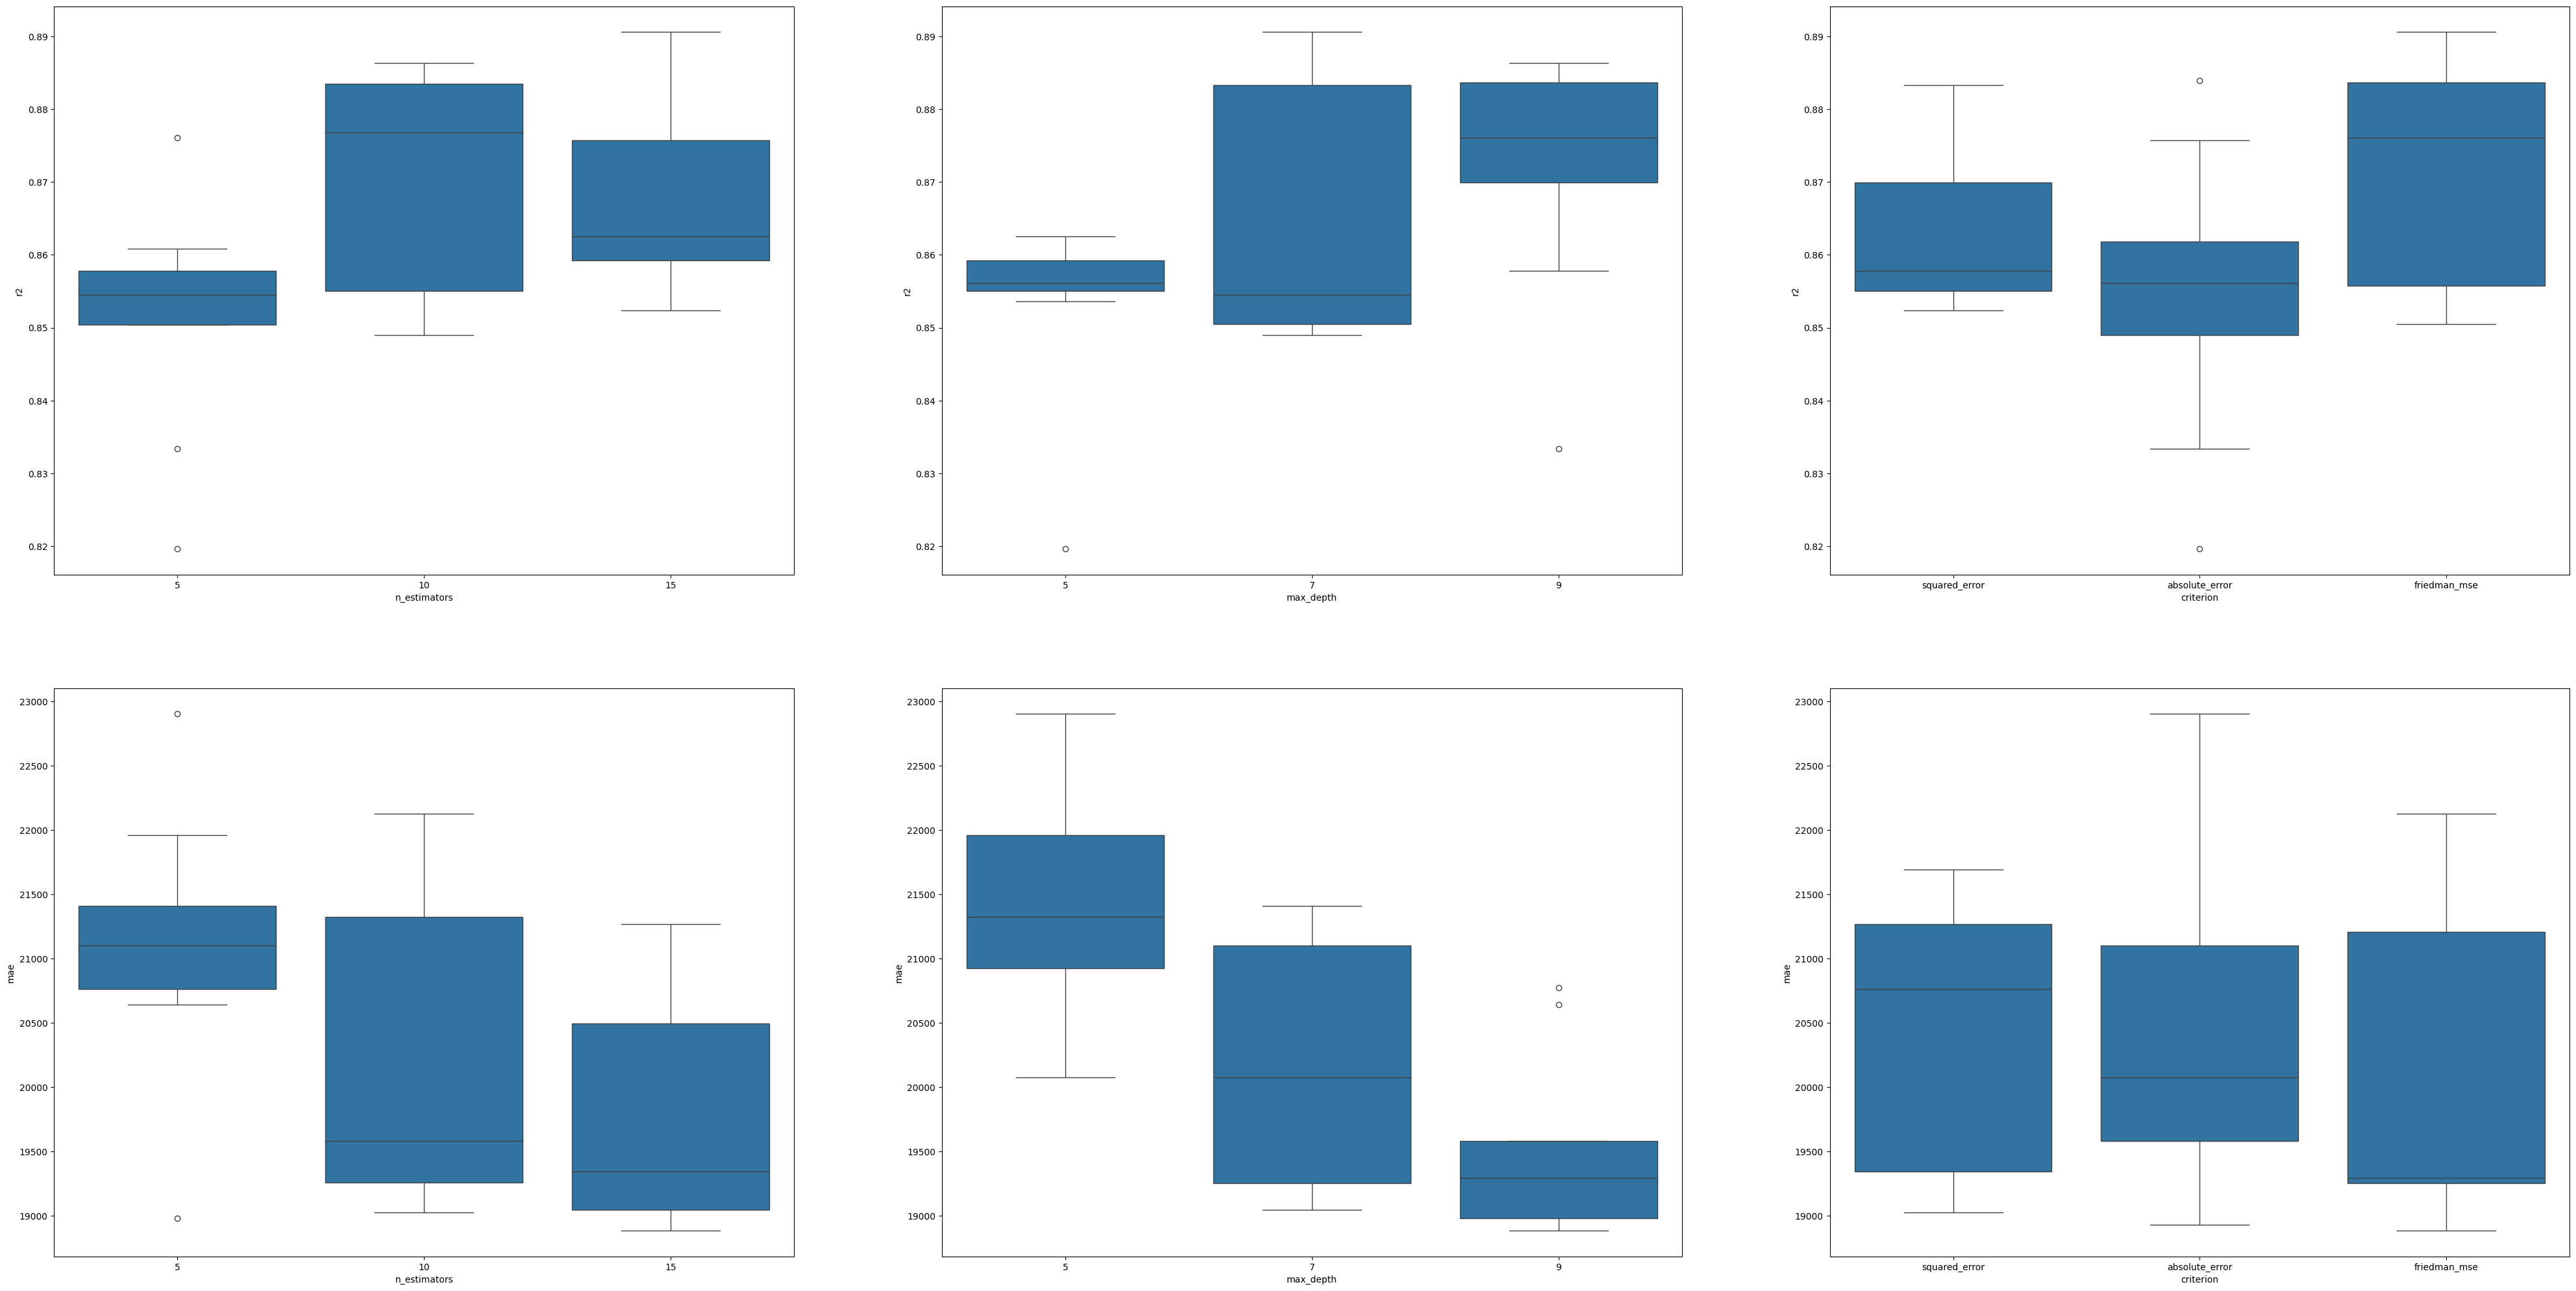

In [18]:
x_axis=['n_estimators', 'max_depth', 'criterion']
y_axis=['r2', 'mae']
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(50,25))
i,j=0,0
for y in y_axis:
    if i==2:break
    for x in x_axis:
        if j==3:j=0
        sns.boxplot(data=statistic.loc[statistic["dataset"]==sort_df.iloc[0,0]],x=x,y=y,ax=ax[i][j])
        j+=1
    i+=1